In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def normalize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i]-np.mean(data[:,i]))/np.std(data[:,i]))
    return data

def load_dataset(path):
    df = pd.read_csv(path,sep = ",")
    data  = np.array(df,dtype = float)
    data = normalize(data)
    return data[:,:2],data[:,2:]

In [4]:
x,y = load_dataset("data.csv")
print("X is : \n {} \n\n Y is : \n{}".format(x[:5,:],y[:5]))

X is : 
 [[-0.50145768 -0.22866478]
 [ 0.50539755 -0.22866478]
 [-0.73303438 -1.54348727]
 [ 1.26053896  1.08615771]
 [-0.0169086   1.08615771]] 

 Y is : 
[[329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]]


In [5]:
h = lambda x,theta: x@theta

cost_function = lambda x,y,theta: ((h(x,theta)-y).T@(h(x,theta)-y))/(2*x.shape[0])

In [6]:
def gradient_descent(x,y,theta,epochs,lr = 0.1):
    m = y.shape[0]
    
    J = []
    
    for epoch in range(epochs):
        h_x = h(x,theta)
        step = (1/m)*(x.T@(h_x-y))
        theta = theta - (lr*step)
        J.append(cost_function(x,y,theta))
    return J,theta

In [7]:
def predict(x,y,epochs,lr=0.1):
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
    theta = np.zeros((x.shape[1],1))
    loss,theta = gradient_descent(x,y,theta,epochs,lr)
    return x,loss,theta

In [8]:
x,loss,theta = predict(x,y,50,0.1)

In [9]:
loss

[array([[5.30106581e+10]]),
 array([[4.31787567e+10]]),
 array([[3.52874391e+10]]),
 array([[2.89446618e+10]]),
 array([[2.38397966e+10]]),
 array([[1.97261498e+10]]),
 array([[1.6407383e+10]]),
 array([[1.37269284e+10]]),
 array([[1.15597078e+10]]),
 array([[9.80563646e+09]]),
 array([[8.3845084e+09]]),
 array([[7.23196102e+09]]),
 array([[6.29628108e+09]]),
 array([[5.5358715e+09]]),
 array([[4.91723755e+09]]),
 array([[4.41338277e+09]]),
 array([[4.00252889e+09]]),
 array([[3.66709264e+09]]),
 array([[3.39286659e+09]]),
 array([[3.16836255e+09]]),
 array([[2.98428445e+09]]),
 array([[2.83310484e+09]]),
 array([[2.70872426e+09]]),
 array([[2.60619693e+09]]),
 array([[2.52150977e+09]]),
 array([[2.45140422e+09]]),
 array([[2.39323237e+09]]),
 array([[2.34484091e+09]]),
 array([[2.30447728e+09]]),
 array([[2.27071385e+09]]),
 array([[2.24238657e+09]]),
 array([[2.21854536e+09]]),
 array([[2.19841391e+09]]),
 array([[2.18135712e+09]]),
 array([[2.16685478e+09]]),
 array([[2.15448015e+09

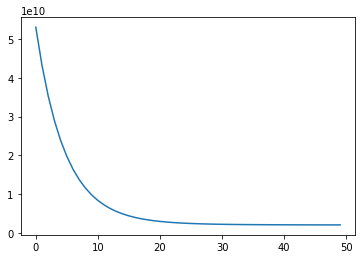

In [110]:
plt.plot(np.array(loss).reshape(-1,1))

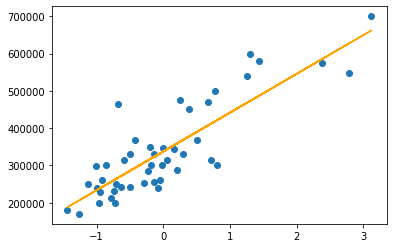

In [112]:
predictions = x@theta
plt.scatter(x[:,1],y)
plt.plot(x[:,1],predictions,"orange")